In [54]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [56]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /


# Visualizations

In [57]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

## Initialize Configs

In [58]:
DB_COLLECTION_NAME = 'exp_mult_repair_levels'
DATASET_NAME = 'Folktables_GA_2018_Income'
EXPERIMENT_SESSION_UUID = '76b4b91b-d36f-4614-aee7-5614876bae6b'
SENSITIVE_ATTRS = ['RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [59]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [60]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [61]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [62]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(57, 33)

In [63]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_2'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall,Test_Set_Index
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,10,OK,2023-11-16 13:45:12.594,76b4b91b-d36f-4614-aee7-5614876bae6b,Exp_iter_2,200,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,10,OK,2023-11-16 13:54:05.869,76b4b91b-d36f-4614-aee7-5614876bae6b,Exp_iter_2,200,...,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0
2,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,10,OK,2023-11-16 14:03:08.295,76b4b91b-d36f-4614-aee7-5614876bae6b,Exp_iter_2,200,...,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0
3,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,10,OK,2023-11-16 13:45:12.594,76b4b91b-d36f-4614-aee7-5614876bae6b,Exp_iter_2,200,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0
4,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,10,OK,2023-11-16 13:54:05.869,76b4b91b-d36f-4614-aee7-5614876bae6b,Exp_iter_2,200,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0
5,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,10,OK,2023-11-16 14:03:08.295,76b4b91b-d36f-4614-aee7-5614876bae6b,Exp_iter_2,200,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0
6,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,10,OK,2023-11-16 13:45:12.594,76b4b91b-d36f-4614-aee7-5614876bae6b,Exp_iter_2,200,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0
7,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,10,OK,2023-11-16 13:54:05.869,76b4b91b-d36f-4614-aee7-5614876bae6b,Exp_iter_2,200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,10,OK,2023-11-16 14:03:08.295,76b4b91b-d36f-4614-aee7-5614876bae6b,Exp_iter_2,200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,10,OK,2023-11-16 13:45:12.594,76b4b91b-d36f-4614-aee7-5614876bae6b,Exp_iter_2,200,...,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,0


In [64]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [65]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [66]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [67]:
vals_to_replace = {
    'Model_Name': {
        'RandomForestClassifier': 'RF',
    }
}

<Figure size 1200x600 with 0 Axes>

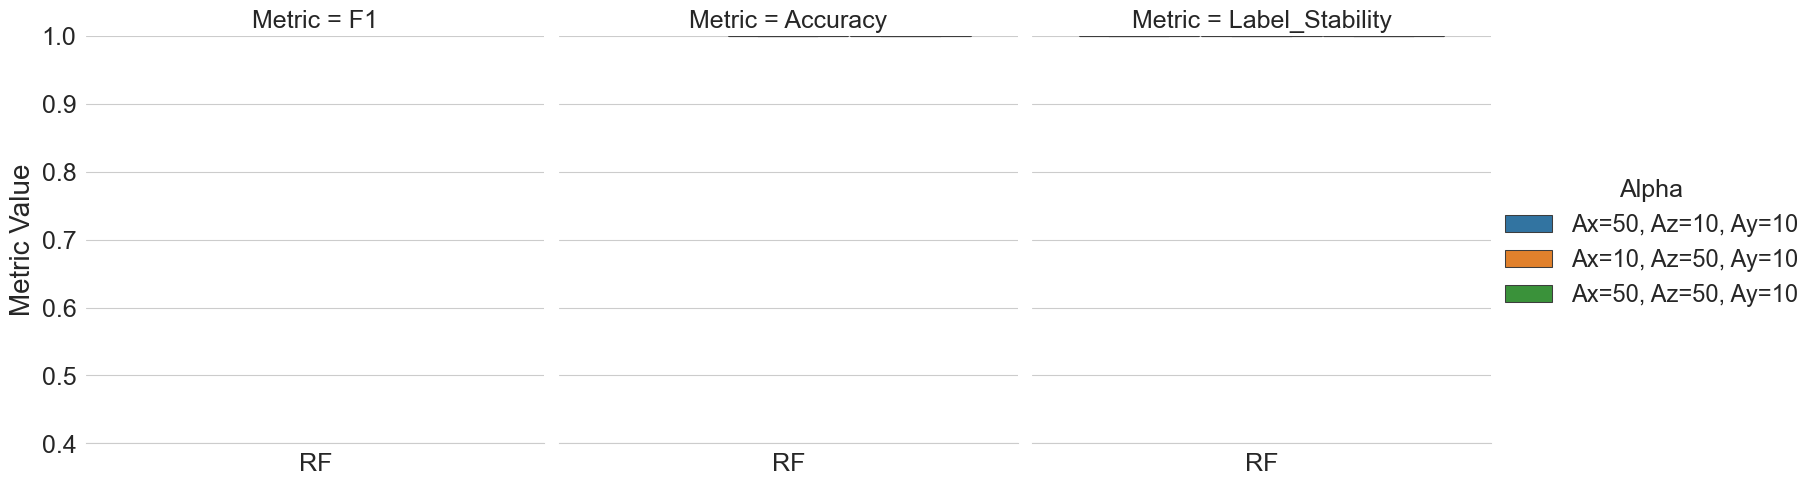

In [68]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.4, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

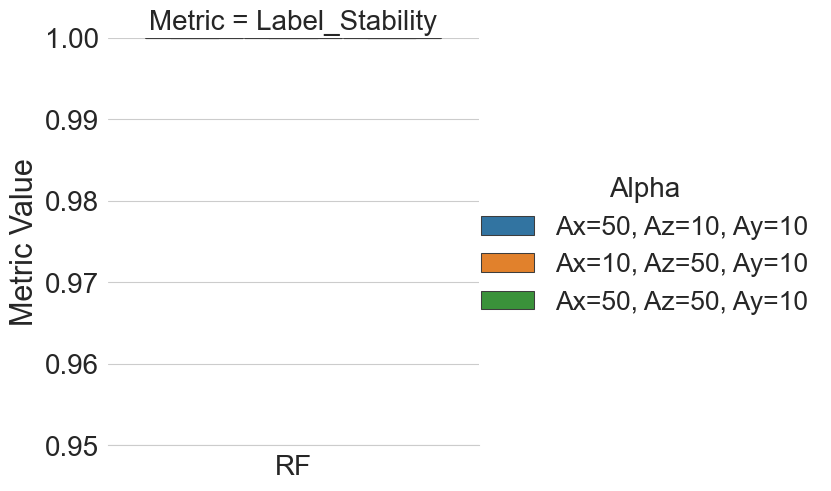

In [69]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.95, 1.00),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

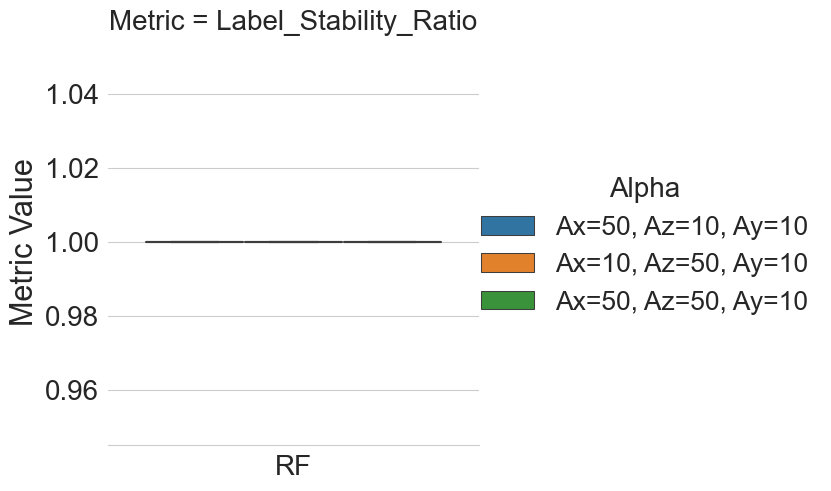

In [70]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

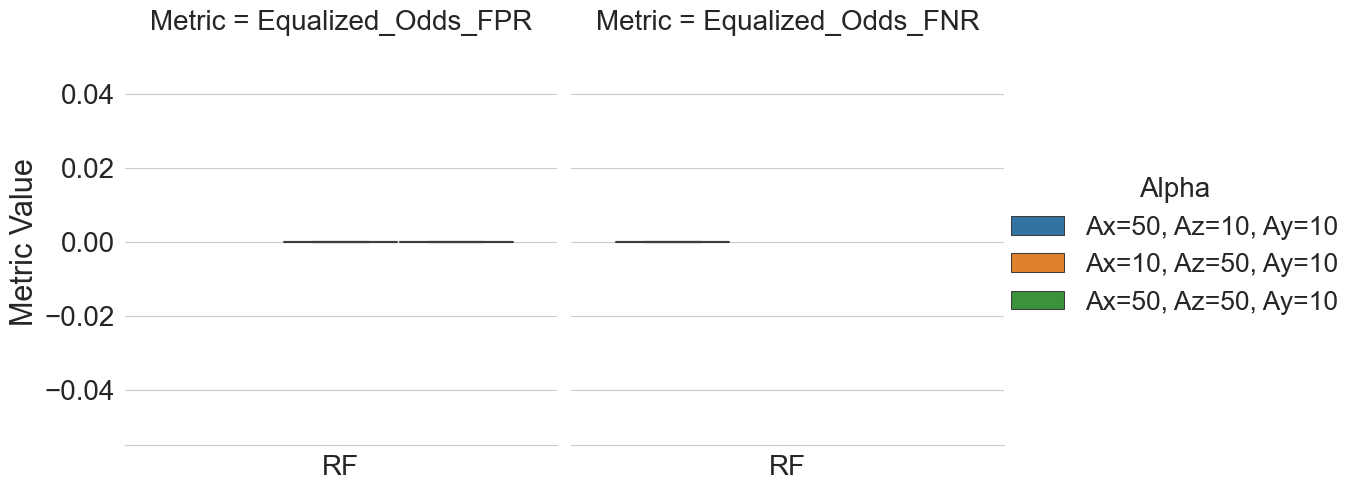

In [71]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

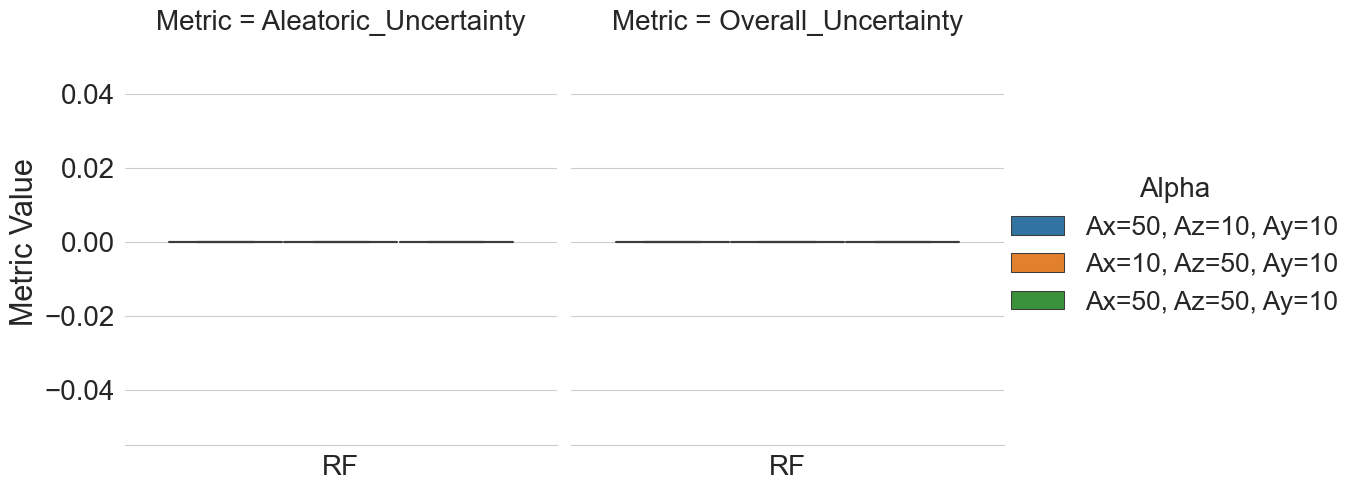

In [72]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.90, 1.00),
                                           metric_names=['Aleatoric_Uncertainty', 'Overall_Uncertainty'],
                                           vals_to_replace=vals_to_replace)